In [103]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")

In [104]:
Tdata = pd.read_csv(r'/content/drive/MyDrive/interview/train_IA_-_train.csv',header = 0,index_col=None)

In [105]:
test = pd.read_csv(r'/content/drive/MyDrive/test_.csv',header = 0,index_col=None )

In [106]:
Tdata

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,...,13,5,Negative,Neutral,16,25,Yes,Yes,No,NaN
5796,2.129354e+11,6.833534e+09,230,QA Manual,0.69,0.31,34,81,115,51,...,3,6,Positive,Negative,23,40,Yes,Yes,No,Consider
5797,8.850640e+11,4.657574e+09,253,Product Manager,0.64,0.36,58,58,43,42,...,19,3,Negative,Neutral,60,18,No,Yes,No,May Consider
5798,6.047461e+11,8.118565e+08,257,Sales,0.94,0.06,104,55,114,68,...,14,3,Neutral,Positive,61,43,Yes,Yes,Yes,Consider


# EDA


In [107]:
Tdata.shape

(5800, 27)

In [108]:
Tdata.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.800000e+03,5.800000e+03,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,4.947029e+11,5.009458e+09,229.553448,0.748321,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,55.175862,47.250690,8.019655,10.503621,4.507586,50.315517,37.306724
std,2.890097e+11,2.873886e+09,22.884836,0.144272,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,20.373655,24.891818,4.311379,5.724640,1.690976,28.696299,13.298407
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.423758e+11,2.513537e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.900364e+11,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.456835e+11,7.468382e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [109]:
Tdata['Status'].fillna(Tdata['Status'].mode().iloc[0], inplace=True)

In [110]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

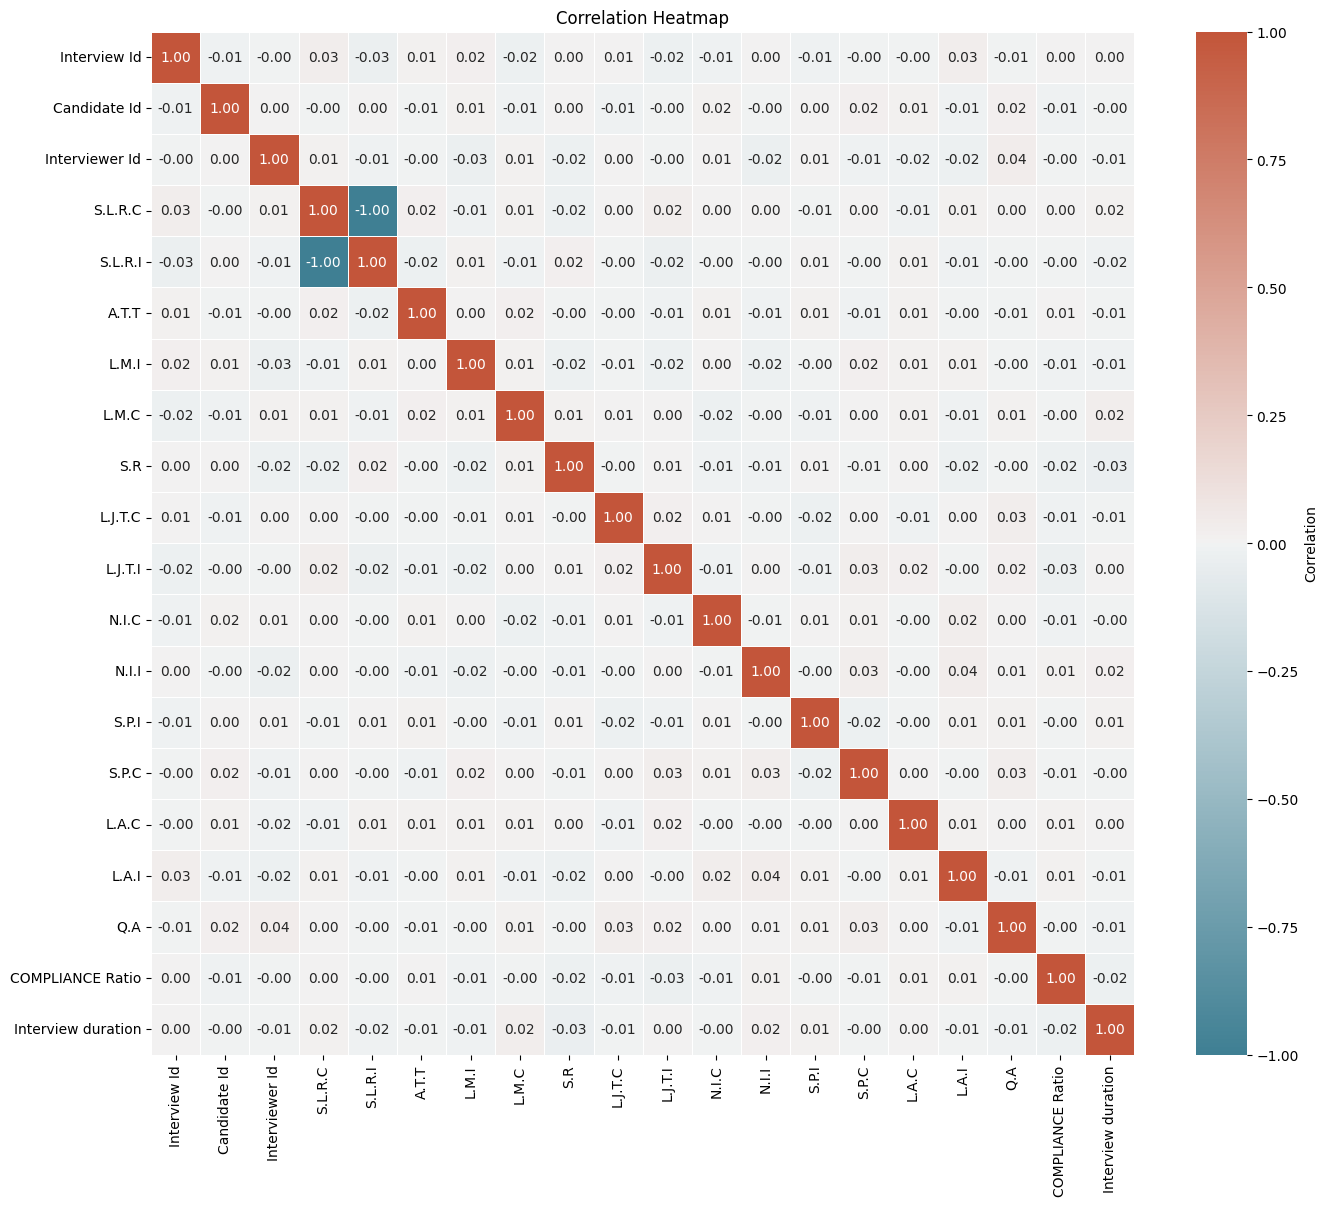

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = Tdata.corr()
top_corr_features = corrmat.index
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(14, 12))
g = sns.heatmap(Tdata[top_corr_features].corr(), cmap=cmap, cbar_kws={'label': 'Correlation'}, linewidths=.5, annot=True, fmt=".2f")
plt.tight_layout()
plt.title('Correlation Heatmap')
plt.show()



<Figure size 500x300 with 0 Axes>

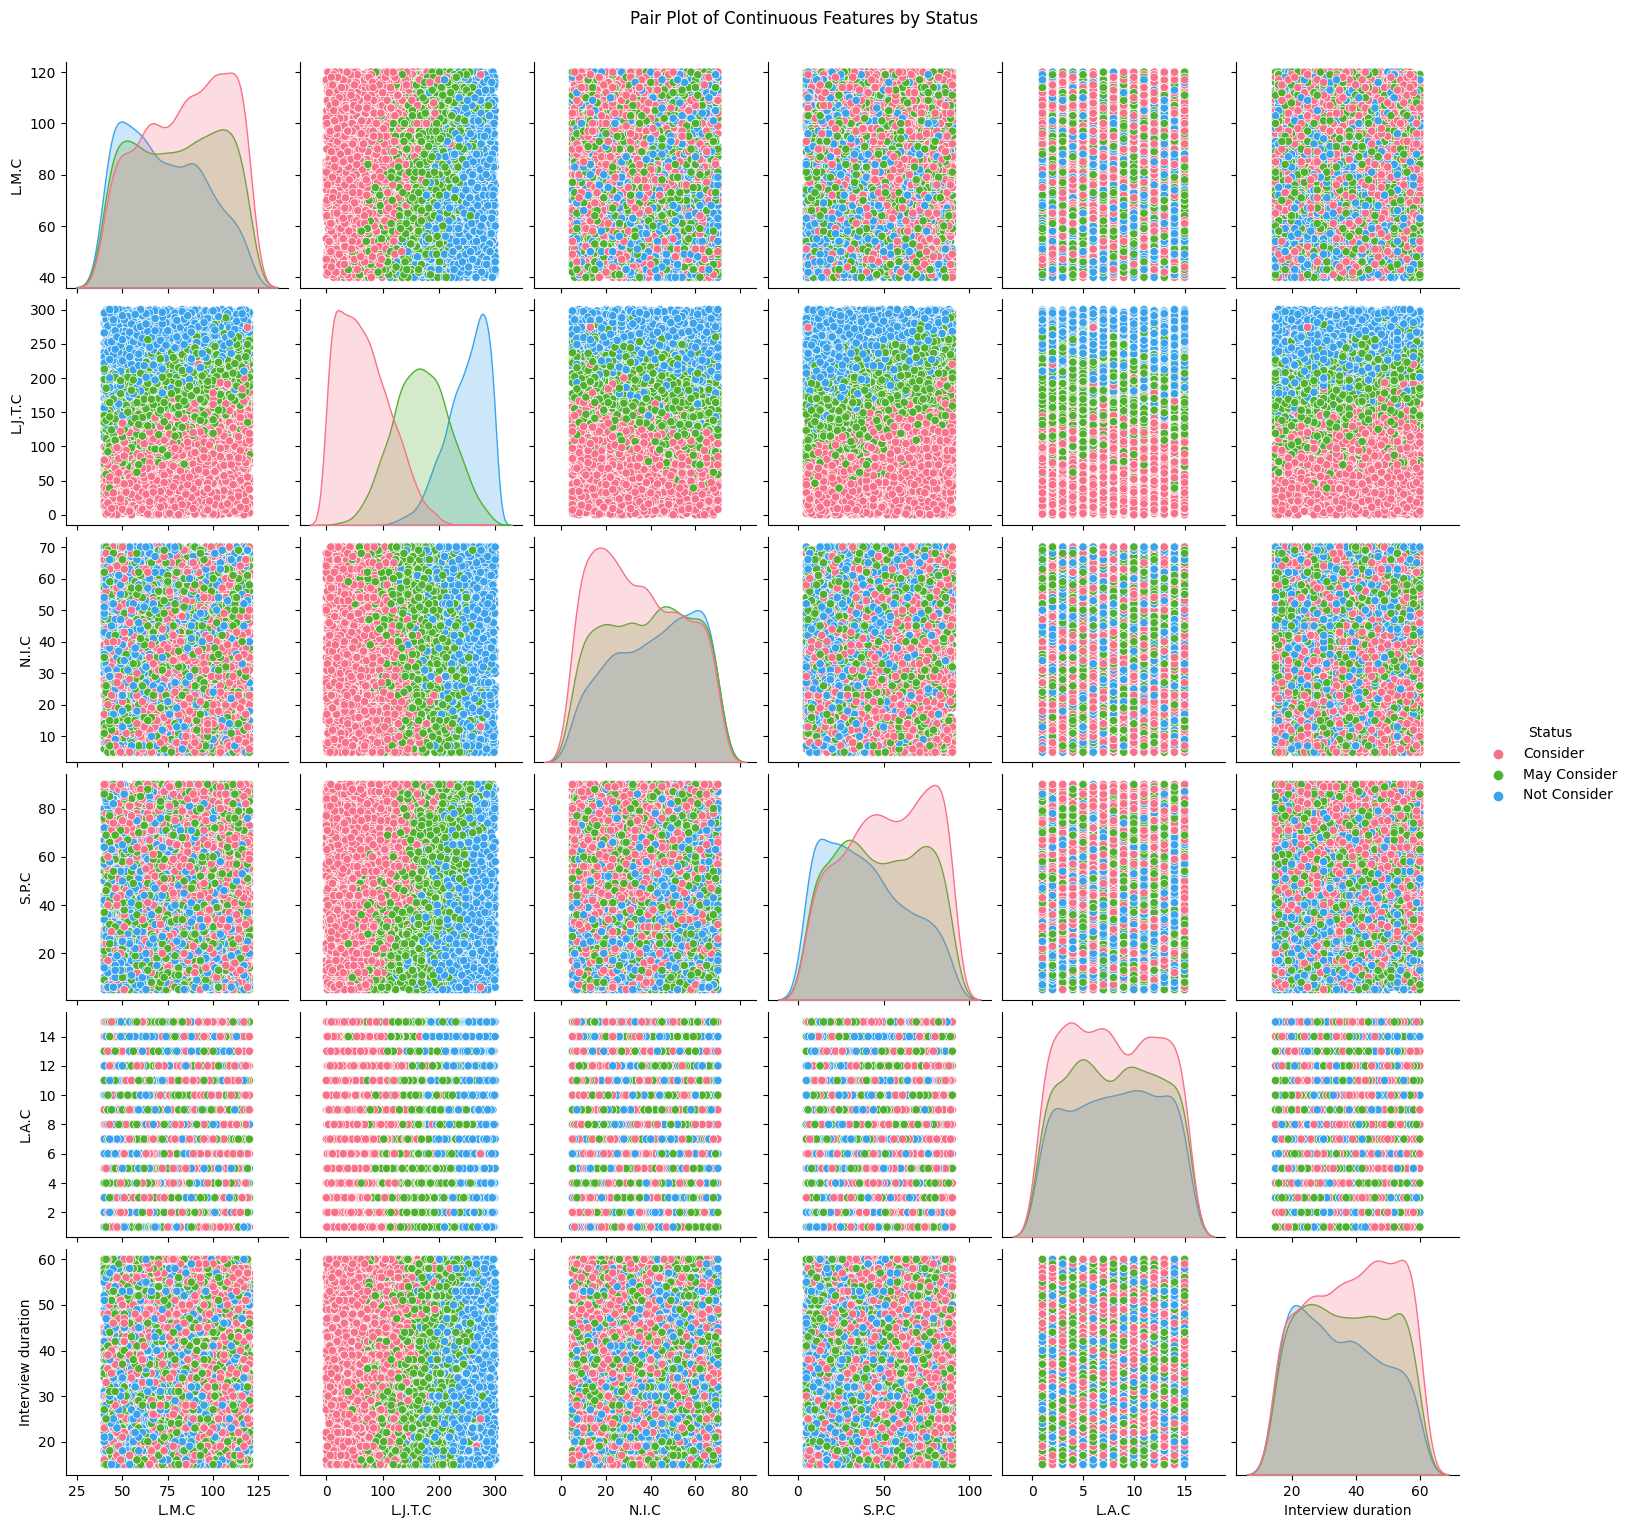

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration', 'Status']
categorical_features = Tdata[selected_columns].select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(5, 3))
sns.pairplot(Tdata[selected_columns], hue='Status', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Continuous Features by Status', y=1.02)
plt.show()

# Drop column


In [113]:
Tdata.drop(columns=["L.A.I","L.M.I","P.E.C","S.L.R.I","Profile","Candidate into","Interviewer Id","S.L.R.C","Candidate Id","L.J.T.I","P.E.I","S.R","N.I.I","A.T.T","Interviewer Intro","S.P.I","Q.A","COMPLIANCE Ratio","Opp to ask"], inplace=True)

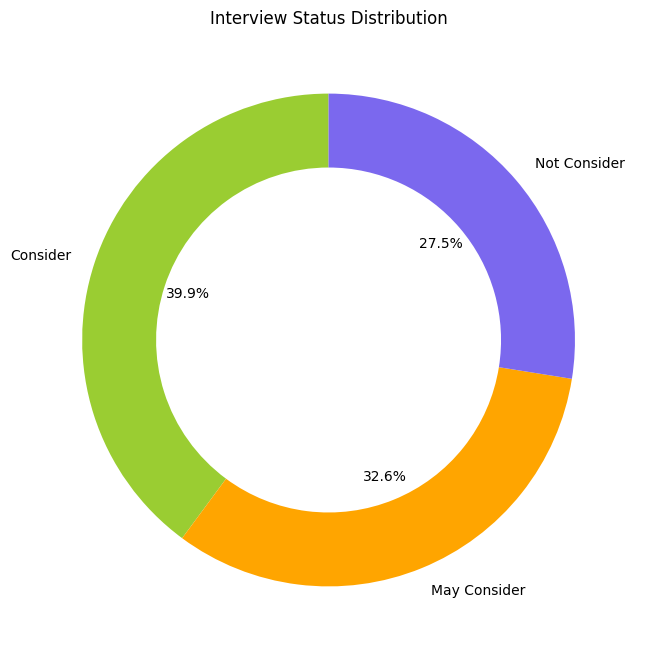

In [114]:
import matplotlib.pyplot as plt

status_counts = {'Consider': 2311, 'May Consider': 1890, 'Not Consider': 1595}
colors = ['yellowgreen','orange','mediumslateblue']
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(status_counts.values(), labels=None, autopct='', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Interview Status Distribution')
percentage_format = '{:.1f}%'
for text, autotext, (status, count) in zip(texts, autotexts, status_counts.items()):
    percentage = (count / sum(status_counts.values())) * 100
    autotext.set_text(percentage_format.format(percentage))
    text.set_text(status)
plt.show()


# Preprocessing

In [115]:
X= Tdata.values[:,0:-1]
y= Tdata.values[:,-1]

# model building

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
scaler = StandardScaler()
x1 = scaler.fit_transform(x_train)
x1_test = scaler.transform(x_test)

In [117]:
algorithms = [
    {'name': 'SVM', 'model': SVC(C=100, gamma=0.001, kernel="rbf", random_state=10)},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier(random_state=10)},
    {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=10)},
    {'name': 'Logistic Regression', 'model': LogisticRegression(C=100, max_iter=1000, random_state = 7)},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier(n_neighbors=5)},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)}
]

for algo in algorithms:
    model = algo['model']
    model.fit(x1, y_train)
    y_pred = model.predict(x1_test)

    # Evaluate the model
    cfm = confusion_matrix(y_test, y_pred)
    print(f"\n{algo['name']} Confusion Matrix:")
    print(cfm)

    classification_rep = classification_report(y_test, y_pred)
    print(f"\n{algo['name']} Classification Report:")
    print(classification_rep)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{algo['name']} Accuracy of the model: {accuracy:.4f}")



SVM Confusion Matrix:
[[452   7   1]
 [  1 385   3]
 [  0   2 309]]

SVM Classification Report:
              precision    recall  f1-score   support

    Consider       1.00      0.98      0.99       460
May Consider       0.98      0.99      0.98       389
Not Consider       0.99      0.99      0.99       311

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160


SVM Accuracy of the model: 0.9879

Decision Tree Confusion Matrix:
[[422  37   1]
 [ 21 337  31]
 [  0  33 278]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Consider       0.95      0.92      0.93       460
May Consider       0.83      0.87      0.85       389
Not Consider       0.90      0.89      0.90       311

    accuracy                           0.89      1160
   macro avg       0.89      0.89      0.89      1160
weighted avg       0.90      0.89      0.89 

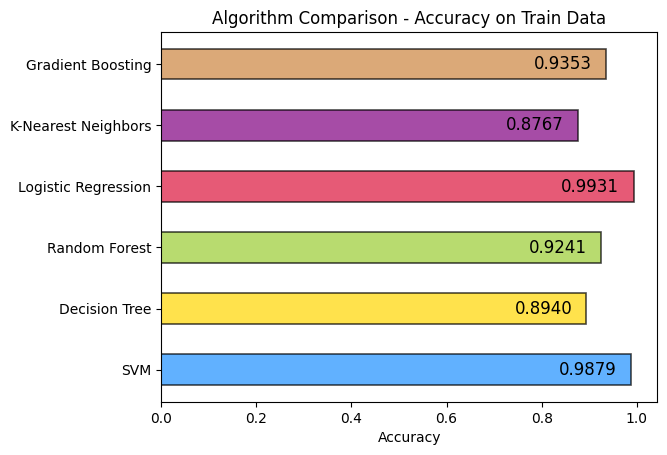

In [118]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = []
colors = ['dodgerblue', 'gold', 'yellowgreen', 'crimson', 'purple', 'peru']

for i, algo in enumerate(algorithms):
    model = algo['model']
    model.fit(x1, y_train)
    y_pred = model.predict(x1_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the horizontal bar plot for the test data with curved ends
algorithm_names = [algo['name'] for algo in algorithms]
y_pos = np.arange(len(algorithm_names))

plt.barh(y_pos, accuracies, color=colors, alpha=0.7, height=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy on Train Data')
plt.yticks(y_pos, algorithm_names)

# Annotate each bar with its accuracy value inside the bar
for i, acc in enumerate(accuracies):
    plt.text(acc - 0.03, y_pos[i], f'{acc:.4f}', ha='right', va='center', fontsize=12, color='black')

plt.show()


# Test data

In [119]:
test.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   float64
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

In [121]:
test['L.J.T.C'].fillna(test['L.J.T.C'].mode().iloc[0], inplace=True)
test.isnull().sum()


Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

In [122]:
test

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,7.021280e+11,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,...,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes,Consider
1,6.134910e+11,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,...,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes,May Consider
2,7.599990e+11,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,...,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes,May Consider
3,3.917600e+11,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,...,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes,Not Consider
4,9.415990e+11,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,...,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes,Not Consider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2.560340e+11,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,...,20.0,7.0,Positive,Negative,86.0,49,Yes,Yes,No,Consider
1196,6.273370e+11,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,...,18.0,2.0,Positive,Negative,32.0,32,No,Yes,No,Not Consider
1197,7.554703e+10,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,...,18.0,3.0,Negative,Negative,34.0,19,Yes,Yes,No,Consider
1198,1.739150e+11,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,...,9.0,7.0,Positive,Negative,78.0,23,No,No,No,Not Consider


In [123]:
test.drop(columns=["L.A.I","L.M.I","P.E.C","S.L.R.I","Profile","Candidate into","Interviewer Id","S.L.R.C","Candidate Id","L.J.T.I","P.E.I","S.R","N.I.I","A.T.T","Interviewer Intro","S.P.I","Q.A","COMPLIANCE Ratio","Opp to ask"], inplace=True)

In [124]:
a= test.values[:,0:-1]
y= test.values[:,-1]

X_test= scaler.transform(a)


In [125]:

for algo in algorithms:
    model = algo['model']
    y_pred_test = model.predict(X_test)

    # Evaluate the model on the test dataset
    cfm_test = confusion_matrix(y, y_pred_test)
    print(f"\n{algo['name']} Confusion Matrix (Test Data):")
    print(cfm_test)

    classification_rep_test = classification_report(y, y_pred_test)
    print(f"\n{algo['name']} Classification Report (Test Data):")
    print(classification_rep_test)

    accuracy_test = accuracy_score(y, y_pred_test)
    print(f"\n{algo['name']} Accuracy on the Test Data: {accuracy_test:.4f}")


SVM Confusion Matrix (Test Data):
[[359  55  55]
 [ 52 286  53]
 [ 75  61 204]]

SVM Classification Report (Test Data):
              precision    recall  f1-score   support

    Consider       0.74      0.77      0.75       469
May Consider       0.71      0.73      0.72       391
Not Consider       0.65      0.60      0.63       340

    accuracy                           0.71      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.71      0.71      0.71      1200


SVM Accuracy on the Test Data: 0.7075

Decision Tree Confusion Matrix (Test Data):
[[334  79  56]
 [ 67 259  65]
 [ 78  77 185]]

Decision Tree Classification Report (Test Data):
              precision    recall  f1-score   support

    Consider       0.70      0.71      0.70       469
May Consider       0.62      0.66      0.64       391
Not Consider       0.60      0.54      0.57       340

    accuracy                           0.65      1200
   macro avg       0.64      0.64      0.64   

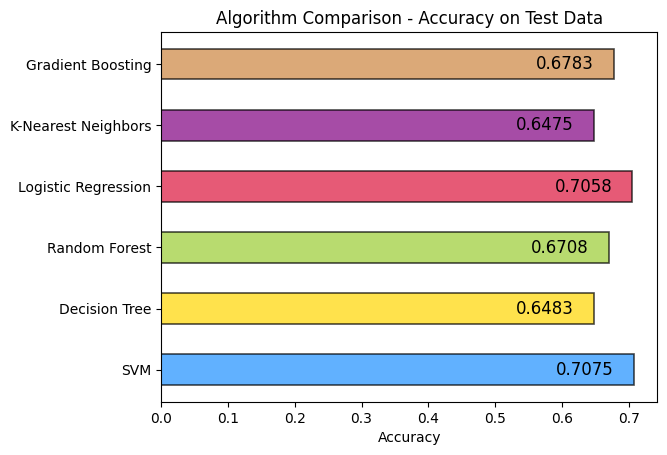

In [126]:
import matplotlib.pyplot as plt
import numpy as np

accuracies_test = []
for algo in algorithms:
    model = algo['model']
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y, y_pred_test)
    accuracies_test.append(accuracy_test)

# Plotting the horizontal bar plot for the test data with curved ends
algorithm_names = [algo['name'] for algo in algorithms]
y_pos = np.arange(len(algorithm_names))

plt.barh(y_pos, accuracies_test, color=colors, alpha=0.7, height=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy on Test Data')
plt.yticks(y_pos, algorithm_names)

# Annotate each bar with its accuracy value inside the bar
for i, acc in enumerate(accuracies_test):
    plt.text(acc - 0.03, y_pos[i], f'{acc:.4f}', ha='right', va='center', fontsize=12, color='black')

plt.show()
